### An analysis of 123 Hapoel Jerusalem vs Maccabi Tel-Aviv
#### taking account all league games played between the years 1955-2019.

Analysis explores these questions: 

1. How has win rate for each team changed over the years? 
2. Is the relative amount of tight-matches games correlates with win rate difference between the teams?
    (games with close ending score are defined as those with 6 points or less difference for the final game score)
3. "Home game effect": How is the number of points scored effected by game location (Home or Away). Is the effect different for TLV and Jeruslaem? Has the effect changed over the decades?
4. Has "Home game effect" changed since Hapeol started to play in its new home court - the "Pais-Arena" stadium.

data was collected from basket.co.il (https://basket.co.il/opponents.asp?cTeam1=8&cTeam2=10&StatsBoard=0&stats_options=1&ReportYear=0)



In [365]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://upload.wikimedia.org/wikipedia/commons/2/26/Jerusalem101.JPG")
#cc wikipedia

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['axes.facecolor'] = '1'
plt.rcParams["figure.dpi"] = 100.


def autolabel(rects,offset,sign = ''):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(str(int(height))+sign),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),  # offset points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=7)

In [353]:
games = pd.read_excel(r'C:\Users\royru\Desktop\primrose\github\coursera\hapoel-macabi.xlsx')
games.head()

,Game,date,houe,court,housr,guest,score
0,1,1955-05-20,NaN,ירושלים,הפועל ירושלים הפועל ירושלים,NaN,NaN
1,מכבי תל אביב מכבי תל אביב,NaT,NaN,NaN,NaN,NaN,NaN
2,86 - 46,NaT,NaN,NaN,NaN,NaN,NaN
3,2,1955-10-07,NaN,"ת""א",מכבי תל אביב מכבי תל אביב,NaN,NaN
4,הפועל ירושלים הפועל ירושלים,NaT,NaN,NaN,NaN,NaN,NaN


In [354]:
#### data cleaning and feature engeniring ####

#get dates of Hapoel jerusalem games at Pais-Arena court
pais_dates = games['date'].loc[games['court'].str[0] == 'פ']

# Sort data from column 'Game' to correct columns"
games['score'] = games['Game']

# medium sized values are Game score
games['score'] = games['score'].apply(lambda x: x if (len(str(x)) > 4 and (len(str(x)) < 10 )) else None)

#insert game score to the correcrt row in DF
for i in range (0,len(games.index)-2):
    games['score'].iloc[i] = games['score'].iloc[i+2]
    
#short valuse are Game #
games['Game'] = games['Game'].apply(lambda x: x if (len(str(x)) <4) else None)

# assert all 123 games are in data frame after DF.dropna
games = games[['Game', 'date', 'housr', 'score']]
games = games.dropna(how = 'any')
game_set = set(list(games['Game']))
game_arange = set(list(np.arange(1,124)))
game_assertion = game_set - game_arange
if len(game_assertion) != 0:
    print ('Game numbers assertion error')
else : 
    print ('Game numbers assertion OK')
    
#Games played in Jer 
games['inJerusalem'] = games['housr'].apply(lambda x: 1 if x[0] =='ה' else 0)

#Games played in TLV 
games['inTlv'] = games['housr'].apply(lambda x: 1 if x[0] =='מ' else 0)

#make sure all games are either in jerualem or in tel aviv
games['assert'] = games['inJerusalem']+games['inTlv']
if len(games.loc[games['assert'] != 1]):
    print ('Game location Error')
else : 
    print ('Game location assertion OK')
games = games.drop(labels=['assert','housr'], axis = 1)

# sort data in score_column to home_score and guest_score - columns
games['home_score'] = games['score'].apply(lambda x: int(x.split('-')[1]))
games['guest_score'] = games['score'].apply(lambda x: int(x.split('-')[0]))

# if home team scored more then guest-team and game was played in tel-aviv - TLV-WIN
games['tlv_win'] = games.loc[games['inTlv'] == 1].apply(lambda x: 1 if (int(x['home_score']) > int(x['guest_score'])) else 0 , axis = 1)

# for games NOT played in TLV , If guest team scored more then home team - TLV-WIN
games['tlv_win'].loc[games['inTlv'] == 0] = games.loc[games['inTlv'] == 0].apply(lambda x: int(1) if (int(x['home_score']) < int(x['guest_score'])) else int(0) , axis = 1)

# If tlv-win == 0 - Jer Win
games['jer_win'] = games['tlv_win'].apply(lambda x: int(1) if int(x) == 0 else int(0))
games['points_scored_by_hapoel'] = games.apply(lambda x: x['home_score'] if x['inJerusalem'] else x['guest_score'], axis = 1)
games['points_scored_by_maccabi'] = games.apply(lambda x: x['home_score'] if x['inTlv'] else x['guest_score'], axis = 1)
games['total_game_points'] = games['points_scored_by_hapoel']+games['points_scored_by_maccabi']
games['close_finish_game'] = games.apply(lambda x: 1 if abs(x['points_scored_by_hapoel']-x['points_scored_by_maccabi'])<= 6 else 0, axis =1)
games['year'] = games['date'].apply(lambda x: x.year)

# Only games played in TLV:
games_tlv = games.loc[games['inTlv'] ==1]

# Only games played in Jerusalem:
games_jer = games.loc[games['inJerusalem'] ==1]
games.head(900)

Game numbers assertion OK
Game location assertion OK


,Game,date,score,inJerusalem,inTlv,home_score,guest_score,tlv_win,jer_win,points_scored_by_hapoel,points_scored_by_maccabi,total_game_points,close_finish_game,year
0,1.0,1955-05-20,86 - 46,1,0,46,86,1.0,0,46,86,132,0,1955
3,2.0,1955-10-07,39 - 83,0,1,83,39,1.0,0,39,83,122,0,1955
6,3.0,1957-12-21,56 - 35,1,0,35,56,1.0,0,35,56,91,0,1957
9,4.0,1958-06-21,53 - 69,0,1,69,53,1.0,0,53,69,122,0,1958
12,5.0,1959-02-28,69 - 62,1,0,62,69,1.0,0,62,69,131,0,1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,119.0,2018-04-22,82 - 81,0,1,81,82,0.0,1,82,81,163,1,2018
357,120.0,2018-12-15,78 - 91,0,1,91,78,1.0,0,78,91,169,0,2018
360,121.0,2019-03-10,89 - 78,1,0,78,89,1.0,0,78,89,167,0,2019
363,122.0,2019-04-08,92 - 98,1,0,98,92,0.0,1,98,92,190,1,2019


In [355]:
# decades analysis
games_by_decades=games.set_index('date')
games_by_decades = games_by_decades.resample('10AS').sum()
games_by_decades['total_games'] = games_by_decades['jer_win']+games_by_decades['tlv_win']
games_by_decades['jer_win_rate'] = 100*games_by_decades['jer_win']/games_by_decades['total_games']
games_by_decades['tlv_win_rate'] = 100*games_by_decades['tlv_win']/games_by_decades['total_games']
games_by_decades['close_finish_rate'] = 100*games_by_decades['close_finish_game']/games_by_decades['total_games']
games_by_decades.head(10)

,Game,inJerusalem,inTlv,home_score,guest_score,tlv_win,jer_win,points_scored_by_hapoel,points_scored_by_maccabi,total_game_points,close_finish_game,year,total_games,jer_win_rate,tlv_win_rate,close_finish_rate
date,,,,,,,,,,,,,,,,
1955-01-01,153.0,9,8,1080,1038,17.0,0,851,1267,2118,1,33326,17.0,0.000000,100.000000,5.882353
1965-01-01,477.0,9,9,1488,1404,17.0,1,1283,1609,2892,2,35441,18.0,5.555556,94.444444,11.111111
1975-01-01,273.0,4,3,660,660,7.0,0,537,783,1320,1,13838,7.0,0.000000,100.000000,14.285714
1985-01-01,867.0,8,9,1518,1403,13.0,4,1347,1574,2921,3,33834,17.0,23.529412,76.470588,17.647059
1995-01-01,1390.0,11,9,1624,1474,16.0,4,1413,1685,3098,5,39989,20.0,20.000000,80.000000,25.000000
2005-01-01,2726.0,13,16,2574,2410,22.0,7,2393,2591,4984,10,58281,29.0,24.137931,75.862069,34.482759
2015-01-01,1740.0,7,8,1231,1188,7.0,8,1201,1218,2419,4,30255,15.0,53.333333,46.666667,26.666667


# How have the win percentages for each team changed over the years

<IPython.core.display.Javascript object>


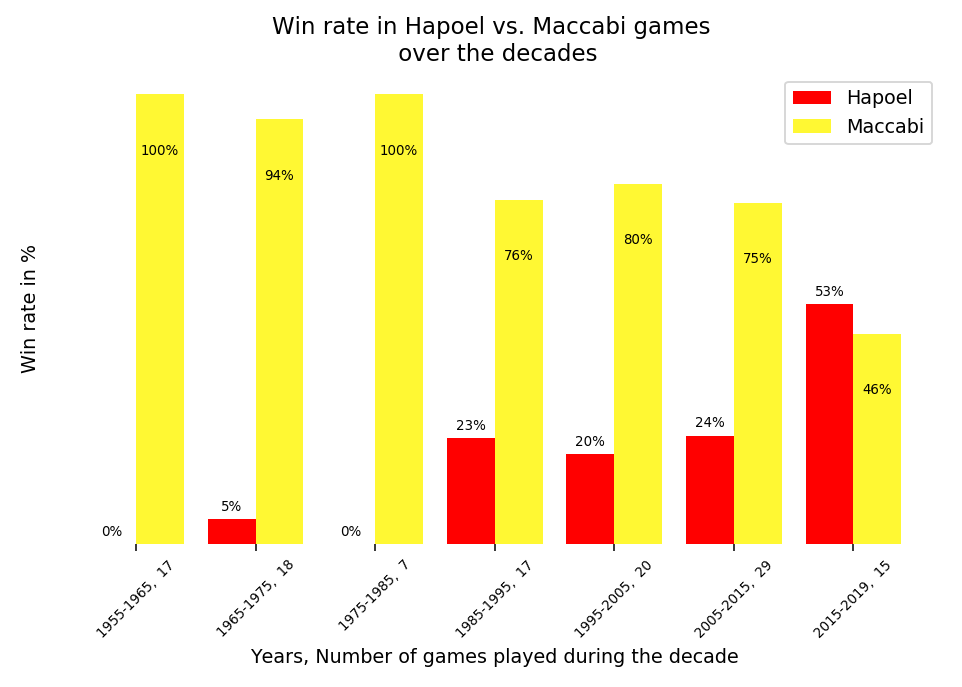

In [326]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
jer_means = games_by_decades['jer_win_rate']
tlv_means = games_by_decades['tlv_win_rate']
plt.title('Win rate in Hapoel vs. Maccabi games \n over the decades')
plt.legend(labels = ['Hapoel win rate', 'Maccabi win rate'])
year_groups = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
x_tics = np.arange(len(jer_means))  # label locations
width = 0.4  # width of the bars
rects1 = ax.bar(x - width/2, jer_means, width, label='Hapoel', color='red')
rects2 = ax.bar(x + width/2, tlv_means, width, label='Maccabi' ,  color='#FFF833')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win rate in %')
ax.set_xticks(x_tics)
x_ticklabels=[]
for i,text in enumerate (year_groups):
    number_of_games = ',  '+str(games_by_decades['total_games'].iloc[i])[:-2]
    x_ticklabels.append(text+number_of_games)
ax.set_xticklabels(x_ticklabels)
plt.xticks(rotation='45', size = 7)
plt.xlabel(xlabel = 'Years, Number of games played during the decade')
ax.set_yticks([])
# remove spine of plot. 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
autolabel(rects1,3,'%')
autolabel(rects2,-33,'%')
plt.tight_layout()
plt.show()



In [327]:
games_by_decades=games.set_index('date')
games_by_decades = games_by_decades.resample('10AS').sum()
games_by_decades['total_games'] = games_by_decades['jer_win']+games_by_decades['tlv_win']
games_by_decades['jer_win_rate'] = 100*games_by_decades['jer_win']/(games_by_decades['total_games'])
games_by_decades['tlv_win_rate'] = 100*games_by_decades['tlv_win']/(games_by_decades['total_games'])
games_by_decades['close_finish_rate'] = 100*games_by_decades['close_finish_game']/(games_by_decades['total_games'])
games_by_decades.head(10)
win_rate_difference = abs(games_by_decades['jer_win_rate']-games_by_decades['tlv_win_rate'])
close_finish_rate = games_by_decades['close_finish_rate']
xinput = win_rate_difference.to_numpy().reshape(-1,1)
yinput = close_finish_rate.to_numpy().reshape(-1,1)
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xinput,yinput)
x = np.arange(10)
y = np.random.randint(0,2,10)
r , p = pearsonr(win_rate_difference,close_finish_rate)
rx_line = np.arange(1,100,1).reshape(-1,1)
ry_line = linear_regressor.predict(rx_line)

<IPython.core.display.Javascript object>


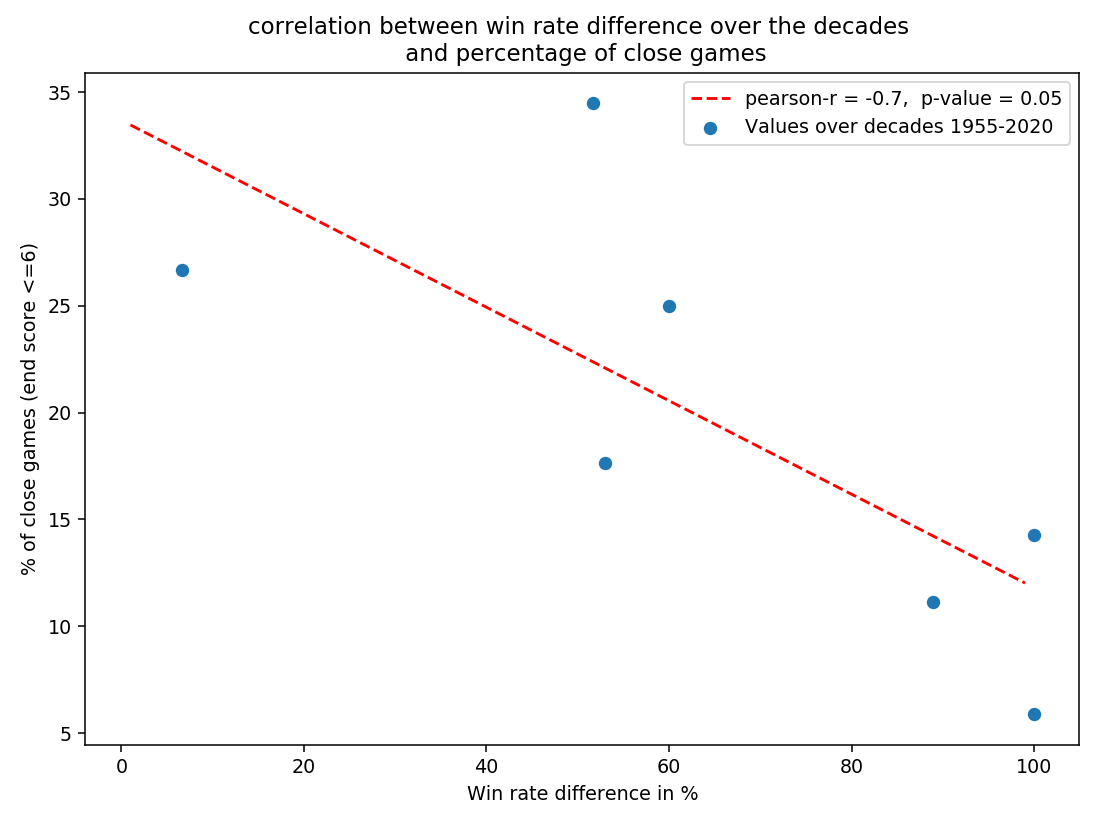

In [328]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
plt.title('correlation between win rate difference over the decades \n and percentage of close games')
line1 = ax.scatter(win_rate_difference,close_finish_rate, label = 'Values over decades 1955-2020')
r_line = ax.plot(rx_line,ry_line, '--r', label = 'pearson-r = {},  p-value = {}'.format(str(r)[:4],str(p)[:4]))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Win rate difference in %')
ax.set_ylabel('% of close games (end score <=6)')
ax.legend()
plt.tight_layout()
plt.show()


In [329]:
games_arrays = [games,games_tlv,games_jer].copy()
for i,df in enumerate(games_arrays):
    games_arrays[i] = games_arrays[i].set_index('date')
    games_arrays[i] = games_arrays[i].resample('10AS').sum()
    games_arrays[i]['total_games'] = games_arrays[i]['inTlv']+games_arrays[i]['inJerusalem']


In [330]:
games_by_decades=games.set_index('date')
games_by_decades = games_by_decades.resample('10AS').sum()
games_by_decades['total_games'] = games_by_decades['jer_win']+games_by_decades['tlv_win']
games_by_decades['jer_win_rate'] = 100*games_by_decades['jer_win']/games_by_decades['total_games']
games_by_decades['avg_points_scored'] = games_by_decades['total_game_points']/games_by_decades['total_games']
games_by_decades['avg_close_games'] = 100*games_by_decades['close_finish_game']/games_by_decades['total_games']
games_by_decades.head()

,Game,inJerusalem,inTlv,home_score,guest_score,tlv_win,jer_win,points_scored_by_hapoel,points_scored_by_maccabi,total_game_points,close_finish_game,year,total_games,jer_win_rate,avg_points_scored,avg_close_games
date,,,,,,,,,,,,,,,,
1955-01-01,153.0,9,8,1080,1038,17.0,0,851,1267,2118,1,33326,17.0,0.000000,124.588235,5.882353
1965-01-01,477.0,9,9,1488,1404,17.0,1,1283,1609,2892,2,35441,18.0,5.555556,160.666667,11.111111
1975-01-01,273.0,4,3,660,660,7.0,0,537,783,1320,1,13838,7.0,0.000000,188.571429,14.285714
1985-01-01,867.0,8,9,1518,1403,13.0,4,1347,1574,2921,3,33834,17.0,23.529412,171.823529,17.647059
1995-01-01,1390.0,11,9,1624,1474,16.0,4,1413,1685,3098,5,39989,20.0,20.000000,154.900000,25.000000


<IPython.core.display.Javascript object>


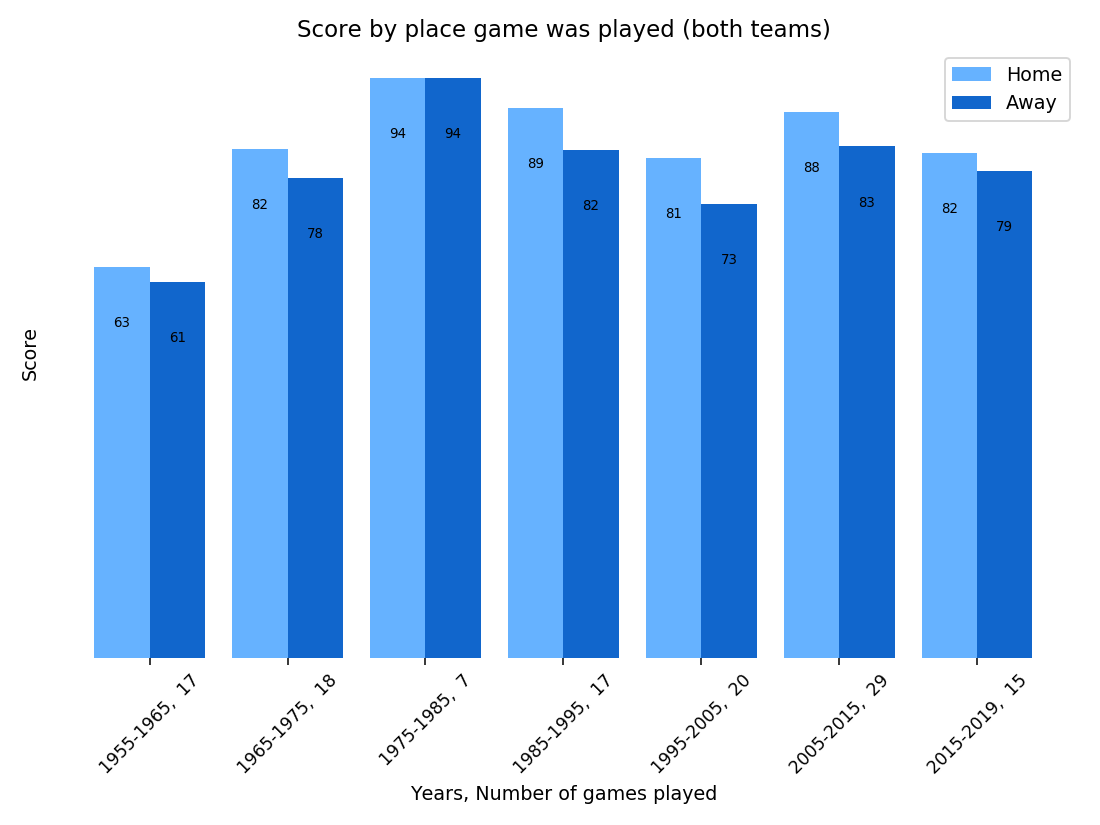

In [331]:
year_groups = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
home_means = (games_arrays[0])['home_score']/(games_arrays[0])['total_games']
away_means = (games_arrays[0])['guest_score']/(games_arrays[0])['total_games']
x = np.arange(len(year_groups))
width = 0.4
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, home_means, width, label='Home', color = '#66B2FF')
rects2 = ax.bar(x + width/2, away_means, width, label='Away' , color = '#1166CC')
autolabel(rects1,-33)
autolabel(rects2,-33)
ax.set_ylabel('Score')
ax.set_title('Score by place game was played (both teams)')
ax.set_xticks(x)
xticklabels = []
for i,text in enumerate (year_groups):
    number_of_games = ',  '+str((games_arrays[0])['total_games'].iloc[i])
    xticklabels.append(text+number_of_games)
ax.set_xticklabels(xticklabels)
plt.xticks(rotation='45', size = 9)
plt.xlabel(xlabel = 'Years, Number of games played')
ax.set_yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


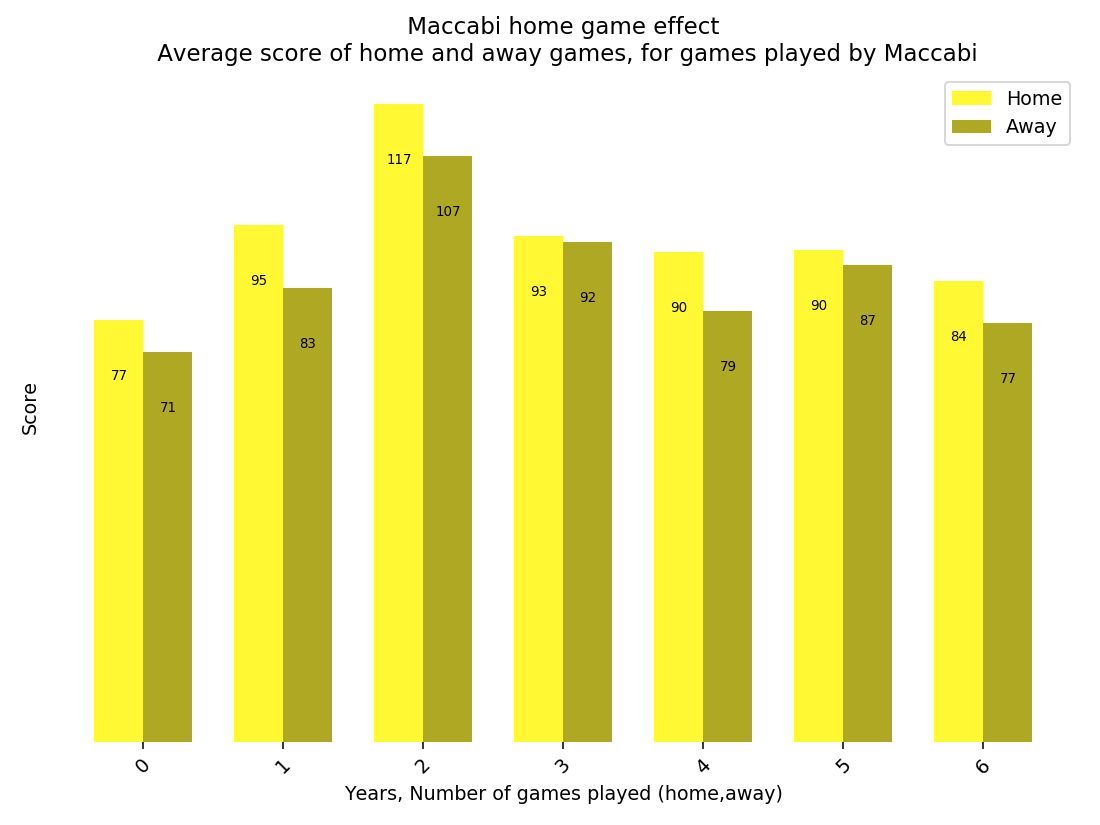

In [332]:
year_groups = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
maccabi_home_means = (games_arrays[1])['home_score']/(games_arrays[1])['total_games']
maccabi_away_means = (games_arrays[2])['guest_score']/(games_arrays[2])['total_games']

x = np.arange(len(a))  # label locations
width = 0.35  # width of the bars
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, maccabi_home_means, width, label='Home', color='#FFF833')
rects2 = ax.bar(x + width/2, maccabi_away_means, width, label='Away' , color='#aFa822')

ax.set_ylabel('Score')
ax.set_title(''' Maccabi home game effect \n Average score of home and away games, for games played by Maccabi''')
ax.set_xticks(x)
xticklabels = []
for i,text in enumerate (year_groups):
    number_of_games = ',  '+str((games_arrays[0])['total_games'].iloc[i])
    xticklabels.append(text+number_of_games)
plt.xticks(rotation='45')
plt.xlabel(xlabel = 'Years, Number of games played (home,away)')
ax.legend()
autolabel(rects1,-33)
autolabel(rects2,-33)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.set_yticks([])
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


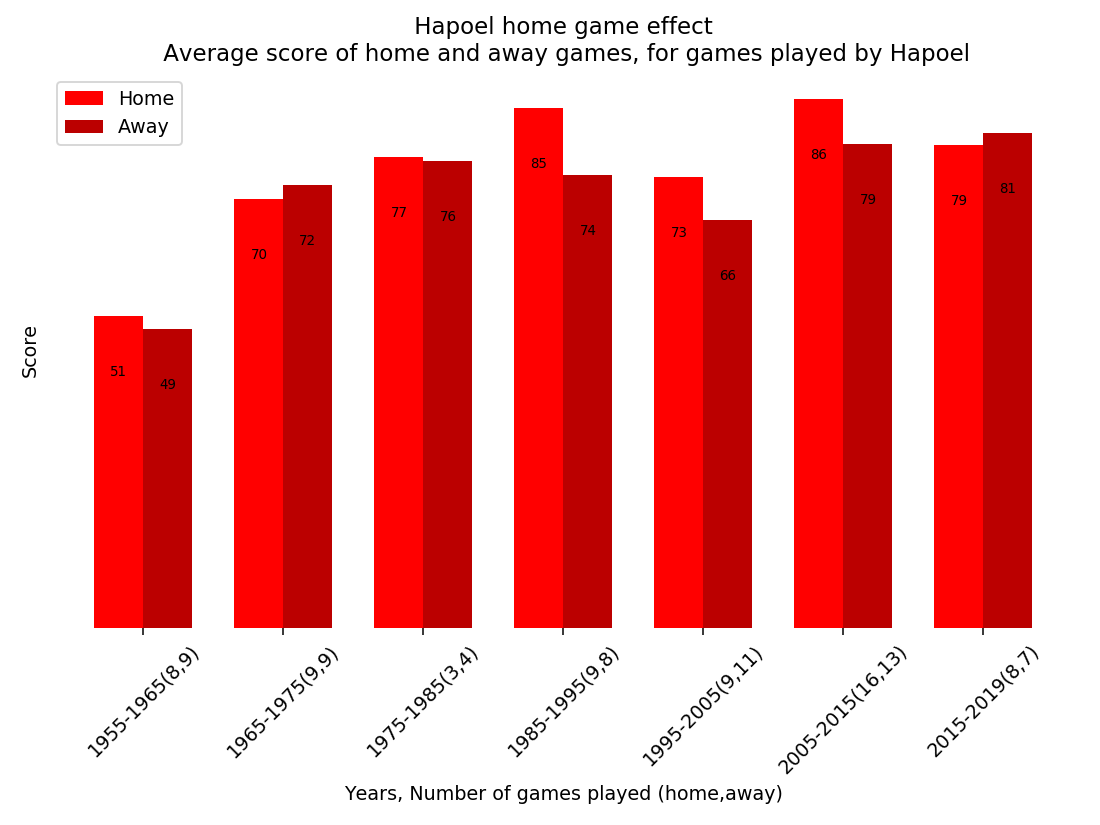

In [333]:
hapoel_home_means = (games_arrays[2])['home_score']/(games_arrays[2])['total_games']
hapoel_away_means = (games_arrays[1])['guest_score']/(games_arrays[1])['total_games']
x = np.arange(len(a))  # label locations
width = 0.35  # width of the bars
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, hapoel_home_means, width, label='Home', color='red')
rects2 = ax.bar(x + width/2, hapoel_away_means, width, label='Away' , color='#bb0000')
ax.set_ylabel('Score')
ax.set_title(''' Hapoel home game effect \n Average score of home and away games, for games played by Hapoel''')
ax.set_xticks(x)
ax.set_xticklabels(a)
xticklabels = []
for i,text in enumerate (year_groups):
    number_of_games = ',  '+str((games_arrays[0])['total_games'].iloc[i])
    xticklabels.append(text+number_of_games)
axes.set_xticklabels(xticklabels)
plt.xticks(rotation='45')
plt.xlabel(xlabel = 'Years, Number of games played (home,away)')
ax.set_yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
autolabel(rects1,-33)
autolabel(rects2,-33)
plt.tight_layout()
plt.show()


In [334]:
games_at_tlv = int(games['inTlv'].sum())
games_at_jer = int(games['inJerusalem'].sum())
maccabi_wins = int(games['tlv_win'].sum())
maccabi_home_wins = int(games_tlv['tlv_win'].sum())
hapoel_wins = int(games['jer_win'].sum())
hapoel_home_wins = int(games_jer['jer_win'].sum())
total_games = int(maccabi_wins+hapoel_wins)
maccabi_winrate = str(maccabi_wins*100/total_games)[:5]
maccabi_home_winrate = str(maccabi_home_wins*100/len(games_tlv))[:5]
hapoel_winrate = str(hapoel_wins*100/total_games)[:5]
hapoel_home_winrate = str(hapoel_home_wins*100/len(games_jer))[:5]
avg_score_for_maccabi = str(games['points_scored_by_maccabi'].sum()/total_games)[:5]
avg_score_for_hapoel = str(games['points_scored_by_hapoel'].sum()/total_games)[:5]
maccabi_home_mean = games_tlv['home_score'].sum()/len(games_tlv)
maccabi_away_mean = games_jer['guest_score'].sum()/len(games_jer)
hapoel_home_mean = games_jer['home_score'].sum()/len(games_jer)
hapoel_away_mean = games_tlv['guest_score'].sum()/len(games_tlv)
maccabi_home_away_diff = (maccabi_home_mean-maccabi_away_mean)
hapeol_home_away_diff = (hapoel_home_mean-hapoel_away_mean)
total_home_away_diff = games['home_score'].mean()-games['guest_score'].mean()
print ('Some statistics to start with:')
data =[[maccabi_wins,hapoel_wins,str(int(maccabi_wins+hapoel_wins))],[maccabi_winrate,hapoel_winrate,(float(maccabi_winrate)+float(hapoel_winrate))/2],[games_at_tlv,games_at_jer,games_at_tlv+games_at_jer],[maccabi_home_wins,hapoel_home_wins,maccabi_home_wins+hapoel_home_wins],[maccabi_home_winrate,hapoel_home_winrate,100*(maccabi_home_wins+hapoel_home_wins)/(games_at_tlv+games_at_jer)],[avg_score_for_maccabi,avg_score_for_hapoel,(float(avg_score_for_maccabi)+float(avg_score_for_hapoel))/2],[maccabi_home_away_diff,hapeol_home_away_diff,total_home_away_diff]]
indexes = ['Number of games won', 'Percentage of games won','Number of games played at home court', 'Number of home games won','Percentage of home games won', 'Avg points scored', 'Home - Away score difference']
stats_table = pd.DataFrame(data,indexes, columns= ['Maccabi','Hapoel','Total'])
stats_table

Some statistics to start with:


,Maccabi,Hapoel,Total
Number of games won,99,24,123
Percentage of games won,80.48,19.51,49.995
Number of games played at home court,62,61,123
Number of home games won,55,17,72
Percentage of home games won,88.70,27.86,58.5366
Avg points scored,87.21,73.37,80.29
Home - Away score difference,6.50106,2.99815,4.86179


In [335]:
from scipy.stats import ttest_ind as ttest
res = ttest(games['home_score'], games['guest_score'])
print ('The effect of home court on home team final game score. \nT-Test score: {}, p-value: {}'.format(str(res[0])[:4],str(res[1])[:4]))
date_first_game_pais_arena = pais_dates.min()
date_last_game_pais_arena = pais_dates.max()
delta_time = date_last_game_pais_arena-date_first_game_pais_arena
pais_arena_games = games_jer.loc[games_jer['date']>= date_first_game_pais_arena]
hapoel_home_games_not_in_pais = games_jer.loc[(~games_jer['date'].isin(pais_dates)) & (games_jer['date']>(date_first_game_pais_arena-delta_time))]
avg_home_score_pais = pais_arena_games['home_score'].mean()
avg_home_score_non_pais = hapoel_home_games_not_in_pais['home_score'].mean()
away_games_pais_arena  = games_tlv.loc[games_tlv['date']>=date_first_game_pais_arena]
avg_away_score_pais = away_games_pais_arena['guest_score'].mean()
away_games_before_pais_arena =  games_tlv.loc[(games_tlv['date']<date_first_game_pais_arena) & (games_tlv['date']>date_first_game_pais_arena-delta_time)]
avg_away_score_before_pais = away_games_before_pais_arena['guest_score'].mean()
home_away_pais = avg_home_score_pais-avg_away_score_pais
home_away_before_pais = avg_home_score_non_pais-avg_away_score_before_pais
print ('It is also interesting to note that although Hapoel win rate since its move to \'Pais-Arena\' stadium is higher then ever, home-away score difference has decreased dramaticly.')
print ('Home - Away score difference for Hapoel since its move to Pais-Arena stadium:',home_away_pais, ' point.')
print ('Home - Away score difference for Hapoel during the 4 years prior to its move to Pais-Arena stadium:',str(home_away_before_pais)[:4], ' point.')

The effect of home court on home team final game score. 
T-Test score: 2.10, p-value: 0.03
It is also interesting to note that although Hapoel win rate since its move to 'Pais-Arena' stadium is higher then ever, home-away score difference has decreased dramaticly.
Home - Away score difference for Hapoel since its move to Pais-Arena stadium: -0.25  point.
Home - Away score difference for Hapoel during the 4 years prior to its move to Pais-Arena stadium: 6.09  point.


In [363]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/ec/Jerusalem_Arena_in_2015_Playoff_Final.jpg")
# cc wikipedia